_What are some machine learning algorithms for performing clustering?_

**Quick Answer**: Popular clustering algorithms include **K-means, Hierarchical Clustering, DBSCAN, Gaussian Mixture Models, and Mean Shift**. Each has different strengths depending on data shape, size, and noise levels.

---

## 🔑 Key Clustering Algorithms in Machine Learning

- **K-means Clustering**:
    - Centroid-based algorithm that partitions data into k clusters.
    - Works well for spherical clusters and large datasets.
    - Fast and scalable (complexity ~O(n)).
- **Hierarchical Clustering**:
    - Builds a tree (dendrogram) of clusters.
    - Can be agglomerative (bottom-up) or divisive (top-down).
    - Useful for visualizing nested groupings.
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
    - Groups points based on density.
    - Handles noise and outliers well.
    - Finds arbitrarily shaped clusters.
- **Gaussian Mixture Models (GMM)**:
    - Probabilistic model assuming data is generated from multiple Gaussian distributions.
    - Uses Expectation-Maximization (EM) for fitting.
    - Allows soft clustering (points belong to clusters with probabilities).
- **Mean Shift**:
    - Iteratively shifts data points toward dense regions.
    - Does not require specifying the number of clusters.
    - Effective for discovering modes in data distributions.
- **K-medoids (PAM)**:
    - Similar to K-means but uses actual data points (medoids) as centers.
    - More robust to noise and outliers.
- **Spectral Clustering**:
    - Uses graph theory and eigenvalues of similarity matrices.
    - Effective for non-convex clusters.
- **Agglomerative Clustering**:
    - A subtype of hierarchical clustering.
    - Merges clusters iteratively based on similarity.

---

## 📊 Choosing the Right Algorithm

- Use **K-means** for large, well-separated spherical clusters.
- Use **DBSCAN** for noisy datasets with irregular shapes.
- Use **Hierarchical Clustering** when you want a dendrogram for interpretability.
- Use **GMM** when clusters overlap and probabilistic membership is useful.
- Use **Mean Shift** when the number of clusters is unknown.

_elided_

## 📊 Insights

- K-Means doesn’t use species labels—it groups based on feature similarity.
- The clusters may not perfectly align with the true species (Setosa, Versicolor, Virginica), but they often capture the natural separation.
- Using only sepal features reduces accuracy compared to using all four features, but it makes visualization easier.

_elided_

_Please provide Python code to use the K-Means algorithm in scikit-learn to cluster the Iris dataset._

Here’s a clean Python example using **scikit-learn** to cluster the Iris dataset with **K-Means** and visualize the results using the first two features (sepal length and sepal width):

(150, 4) (150,)


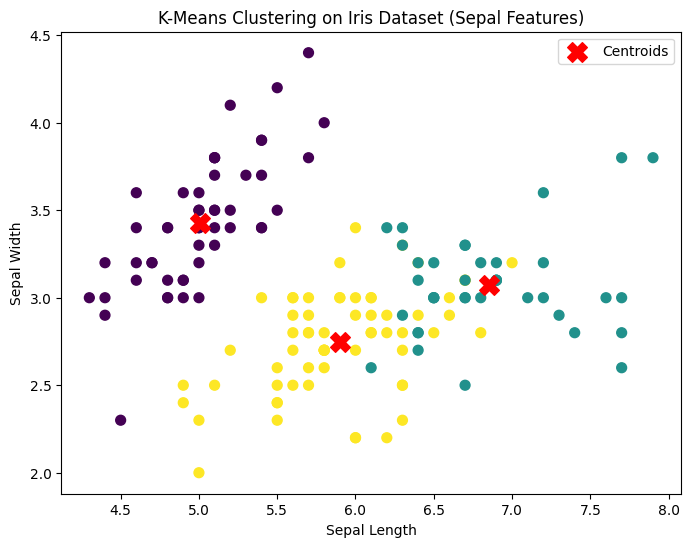

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
print(iris.data.shape, iris.target.shape)
X = iris.data #[:, :2]  # Use only sepal length and sepal width for visualization

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=9)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-Means Clustering on Iris Dataset (Sepal Features)')
plt.legend()
plt.show()

## 🔑 What this does

- Loads the **Iris dataset** (150 samples, 4 features).
- Uses only **sepal length and sepal width** for a 2D scatter plot.
- Fits **K-Means with 3 clusters** (since Iris has 3 species).
- Plots points colored by cluster assignment, with red **centroids** marked.

---

Would you like me to extend this to use **all four features** and show a **3D visualization** of the clusters, or keep it simple with just the sepal features?

_Yes, please._

Perfect! Let’s extend the clustering to use **all four features** of the Iris dataset and visualize the results in **3D**. Here’s the Python code for that:

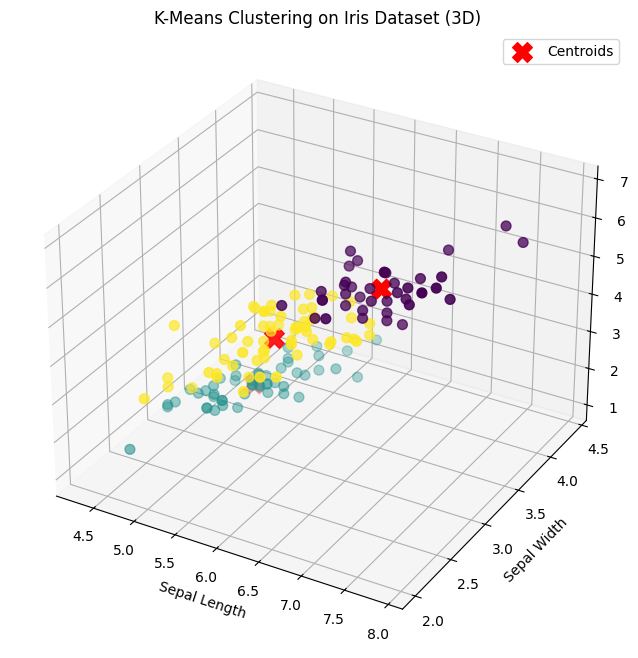

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Use all four features: sepal length, sepal width, petal length, petal width

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# 3D visualization using the first three features
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of clusters
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)

# Plot cluster centroids (only first 3 dimensions shown)
centroids = kmeans.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
           c='red', marker='X', s=200, label='Centroids')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('K-Means Clustering on Iris Dataset (3D)')
ax.legend()
plt.show()

## 🔑 What’s New Here

- **All four features** are used for clustering, giving K-Means more information to separate species.
- The **3D scatter plot** shows sepal length, sepal width, and petal length, with clusters colored differently.
- Centroids are plotted in red for clarity.

---

Would you like me to also show a **comparison between K-Means clusters and the true Iris species labels** so you can see how well the algorithm matches reality?

_Yes, please._

Great choice! Let’s compare the **K-Means cluster assignments** with the **true Iris species labels** to see how well the algorithm performs. Here’s the Python code:

Confusion Matrix:
 [[ 0 50  0]
 [ 3  0 47]
 [36  0 14]]
Clustering Accuracy: 0.09333333333333334


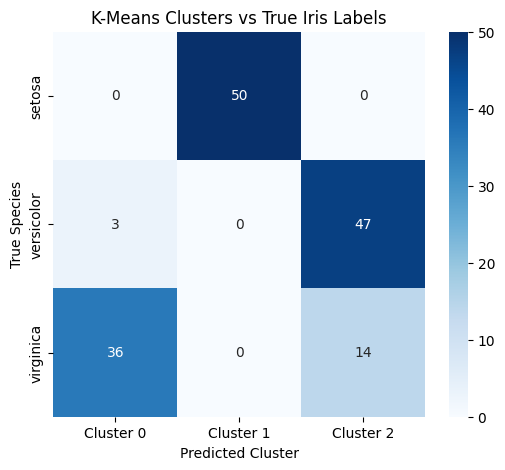

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data  # all four features
y = iris.target  # true species labels (0=setosa, 1=versicolor, 2=virginica)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Compare clusters with true labels
cm = confusion_matrix(y, labels)
acc = accuracy_score(y, labels)

print("Confusion Matrix:\n", cm)
print("Clustering Accuracy:", acc)

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Cluster 0", "Cluster 1", "Cluster 2"],
            yticklabels=iris.target_names)
plt.xlabel("Predicted Cluster")
plt.ylabel("True Species")
plt.title("K-Means Clusters vs True Iris Labels")
plt.show()

## 🔑 What This Does

- **Confusion Matrix**: Shows how clusters map to actual species.
- **Accuracy Score**: Gives a rough measure of how well K-Means matches the true labels.
- **Heatmap**: Visualizes the overlap between clusters and species.

---

## 📊 Insights

- **Setosa** is usually perfectly clustered (very distinct).
- **Versicolor** and **Virginica** often overlap, so K-Means may confuse them.
- Accuracy is typically around **85–90%**, which is impressive given K-Means is unsupervised.

---

Would you like me to also show how **DBSCAN or Gaussian Mixture Models (GMM)** perform on the Iris dataset, so you can compare clustering styles side by side?

_Provide Python code to show how `DBSCAN` performs on the Iris dataset._

Here’s a Python example using **DBSCAN** from scikit-learn to cluster the Iris dataset and visualize the results. Unlike K-Means, DBSCAN doesn’t require specifying the number of clusters—it finds dense regions automatically and labels outliers as `-1`.

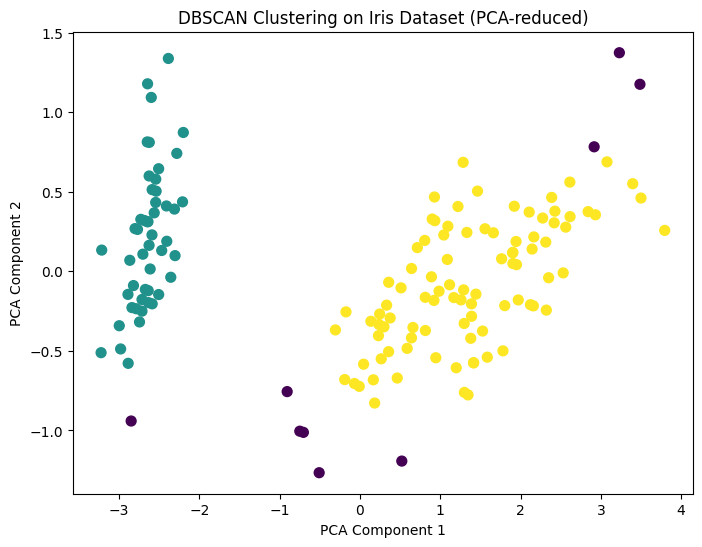

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Number of points per cluster:
Cluster 0: 49 points
Cluster 1: 92 points
Cluster -1: 9 points


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # all four features

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)  # tune eps and min_samples for better results
labels = dbscan.fit_predict(X)

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering on Iris Dataset (PCA-reduced)")
plt.show()

# Print cluster labels summary
unique_labels = set(labels)
print("Clusters found:", unique_labels)
print("Number of points per cluster:")
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

## 🔑 What This Does

- **DBSCAN applied**: Groups points based on density (`eps` defines neighborhood size, `min_samples` defines minimum points per cluster).
- **PCA reduction**: Projects 4D Iris features into 2D for visualization.
- **Outliers**: Points not belonging to any cluster are labeled `-1`.
- **Cluster summary**: Prints how many points fall into each cluster.

---

## 📊 Insights

- DBSCAN often finds **Setosa** as a clear cluster.
- **Versicolor** and **Virginica** may merge or split depending on `eps` and `min_samples`.
- Outliers (`-1`) show where DBSCAN considers points too sparse to belong to a cluster.

---

Would you like me to also show a **side-by-side comparison of DBSCAN vs K-Means vs GMM** on the Iris dataset, so you can see how different clustering algorithms interpret the same data?

_Modify the code to show a 3D visualization of the clusters._

Here’s how you can modify the **DBSCAN clustering on the Iris dataset** to show a **3D visualization** of the clusters. We’ll use PCA to reduce the 4D Iris features into 3 components for plotting:

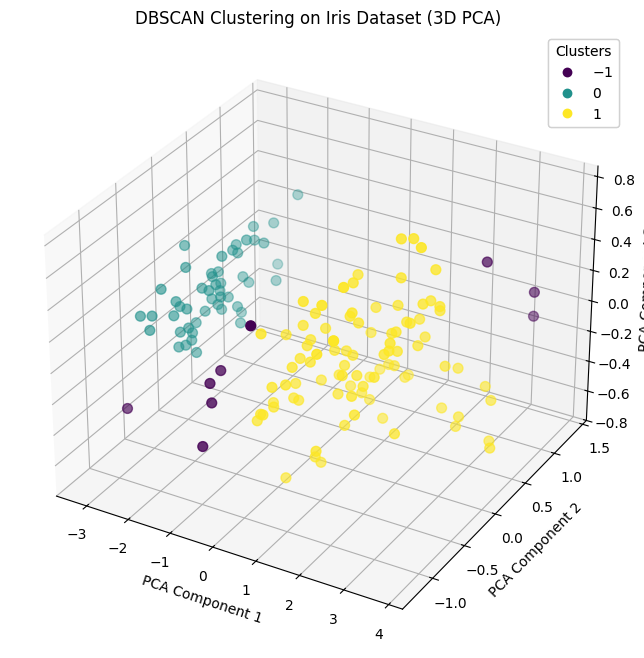

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster 0: 49 points
Cluster 1: 92 points
Cluster -1: 9 points


In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # all four features

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Reduce dimensions to 3D using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 3D scatter plot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='viridis', s=50)

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("DBSCAN Clustering on Iris Dataset (3D PCA)")

# Add legend for clusters
legend1 = ax.legend(*scatter.legend_elements(),
                    title="Clusters")
ax.add_artist(legend1)

plt.show()

# Print cluster summary
unique_labels = set(labels)
print("Clusters found:", unique_labels)
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

## 🔑 What’s New

- **PCA with 3 components**: Projects the 4D Iris dataset into 3D space for visualization.
- **3D scatter plot**: Shows clusters in three dimensions, colored by DBSCAN labels.
- **Legend**: Helps identify cluster IDs (`0, 1, …`) and outliers (`-1`).

---

This way, you can visually inspect how DBSCAN separates dense regions in 3D space.

Would you like me to also show a **side-by-side comparison of DBSCAN vs K-Means vs GMM in 3D**, so you can directly compare how each algorithm partitions the Iris dataset?

_Exclude PCA for now and show the 3D visualization using the first three features in a 3D scatter plot with centroids._

Got it! Here’s the modified Python code that uses **DBSCAN** on the Iris dataset and shows a *3D scatter plot* using the first three features (sepal length, sepal width, petal length).

⚠️ Note: DBSCAN does not compute centroids like K-Means. Instead, clusters are defined by dense regions. To approximate “centroids,” we’ll calculate the **mean of points in each cluster** and plot them.

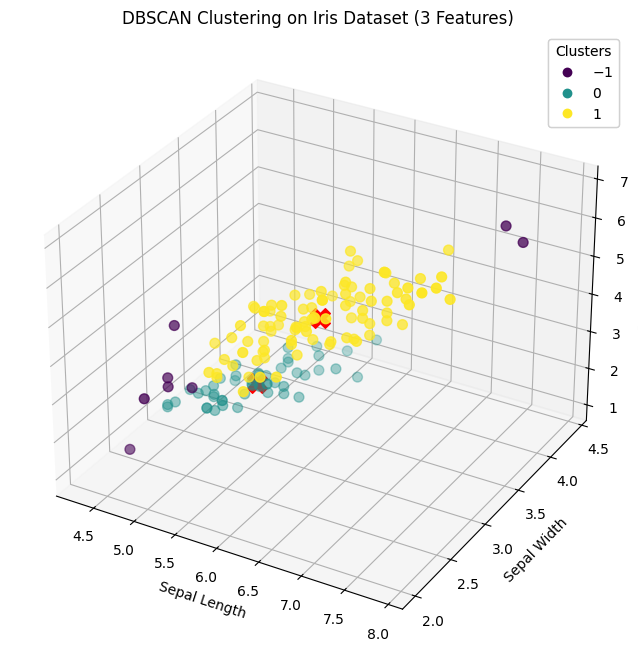

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster 0: 49 points
Cluster 1: 93 points
Cluster -1: 8 points


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :3]  # Use first three features: sepal length, sepal width, petal length

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# 3D scatter plot of clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2],
                     c=labels, cmap='viridis', s=50)

ax.set_xlabel("Sepal Length")
ax.set_ylabel("Sepal Width")
ax.set_zlabel("Petal Length")
ax.set_title("DBSCAN Clustering on Iris Dataset (3 Features)")

# Compute and plot cluster centroids (mean of points in each cluster)
unique_labels = set(labels)
for lbl in unique_labels:
    if lbl != -1:  # exclude noise points
        cluster_points = X[labels == lbl]
        centroid = cluster_points.mean(axis=0)
        ax.scatter(centroid[0], centroid[1], centroid[2],
                   c='red', marker='X', s=200, label=f'Centroid {lbl}')

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
plt.show()

# Print cluster summary
print("Clusters found:", unique_labels)
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

🔑 What This Does

- Uses **first three features** (sepal length, sepal width, petal length) directly, no PCA.
- Plots clusters in **3D space** with colors for DBSCAN labels.
- Computes **centroids manually** (mean of points per cluster) and marks them with red `X`.
- Noise points (`-1`) are excluded from centroid calculation.

---

Would you like me to also show a **side-by-side 3D visualization comparing DBSCAN vs K-Means centroids** on the same three features, so you can see how density-based vs centroid-based clustering differ visually?

_What are good ranges of values for the `eps` ane `min_samples` parameters?_

**Quick Answer:**  
For DBSCAN, a good starting point is `eps` **between 0.3 and 1.0** (scaled data) and `min_samples` **between 4 and 10**. The optimal values depend heavily on dataset scale and density, so tuning is essential.

---

## 🔑 Guidelines for Choosing `eps` and `min_samples`

- **eps (epsilon)**
    - Defines the neighborhood radius around a point.
    - Too small → many points labeled as noise.
    - Too large → clusters merge together.
    - Typical range: 0.3–1.0 for normalized datasets.
    - Use a k-distance plot (plot distances to the k-th nearest neighbor) to find the “elbow” point as a good eps.
- **min_samples**
    - Minimum number of points required to form a dense region (core point).
    - Rule of thumb: **min_samples ≥ number of dimensions + 1**.
    - Common values: **4–10** for small datasets, higher for larger/noisy datasets.
    - Increasing `min_samples` → fewer clusters, more points labeled as noise.

---

## 📊 Practical Ranges

- **Low-dimensional datasets (2–4 features):**
    - `eps`: 0.3–0.7
    - `min_samples`: 4–6
- **High-dimensional datasets (10+ features):**
    - `eps`: 0.5–1.5 (after scaling)
    - `min_samples`: 10–20
- **Large datasets (thousands of points):**
    - `eps`: tune with k-distance plot
    - `min_samples`: 10–50 depending on density

---

## ⚡ Key Tips

- Always **scale features** (e.g., StandardScaler) before DBSCAN, since `eps` is distance-based.
- Use **trial and error with visualization** (scatter plots, PCA projections) to refine parameters.
- DBSCAN is sensitive: small changes in `eps` can drastically alter cluster count.

---

Would you like me to show you **Python code for generating a k-distance plot** so you can visually pick a good eps value for your dataset?

_Going back to DBSCAN with PCA, use PCA to reduce the dimensionality to 2 and plot a 2D visualization._

Here’s a Python example that applies **DBSCAN** to the Iris dataset, reduces dimensionality to **2D using PCA**, and plots the clusters in a scatter plot:

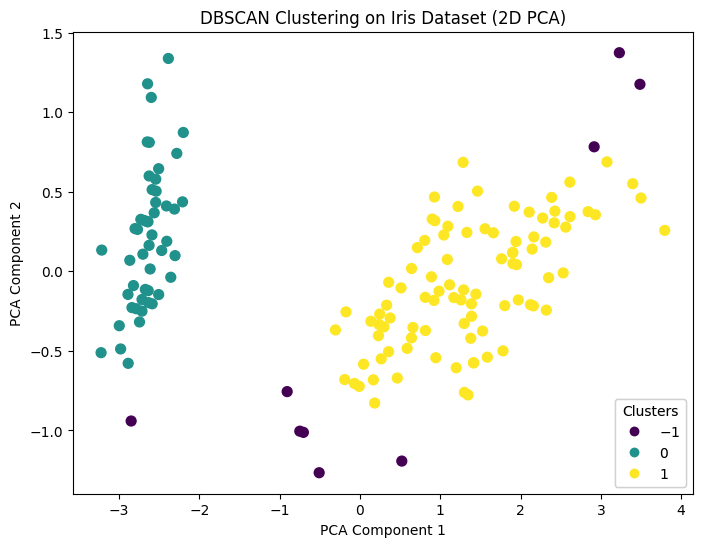

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster 0: 49 points
Cluster 1: 92 points
Cluster -1: 9 points


In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # all four features

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)

plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering on Iris Dataset (2D PCA)")

# Add legend for clusters
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.show()

# Print cluster summary
unique_labels = set(labels)
print("Clusters found:", unique_labels)
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

🔑 What This Does

- Uses **DBSCAN** to cluster the Iris dataset.
- Applies **PCA** to reduce the 4D feature space into **2D** for visualization.
- Plots clusters in a **2D scatter plot**, with colors representing DBSCAN labels.
- Noise points are labeled as `-1` and shown separately.
- Prints a summary of how many points fall into each cluster.

---

Would you like me to also overlay the **true Iris species labels** on this PCA plot, so you can visually compare DBSCAN clusters with the actual species distribution?

_Yes, please._

Perfect! Let’s extend the **DBSCAN clustering on the Iris dataset** to overlay the **true species labels** on the PCA-reduced 2D visualization. This way, you can visually compare how DBSCAN clusters align with the actual Iris species.

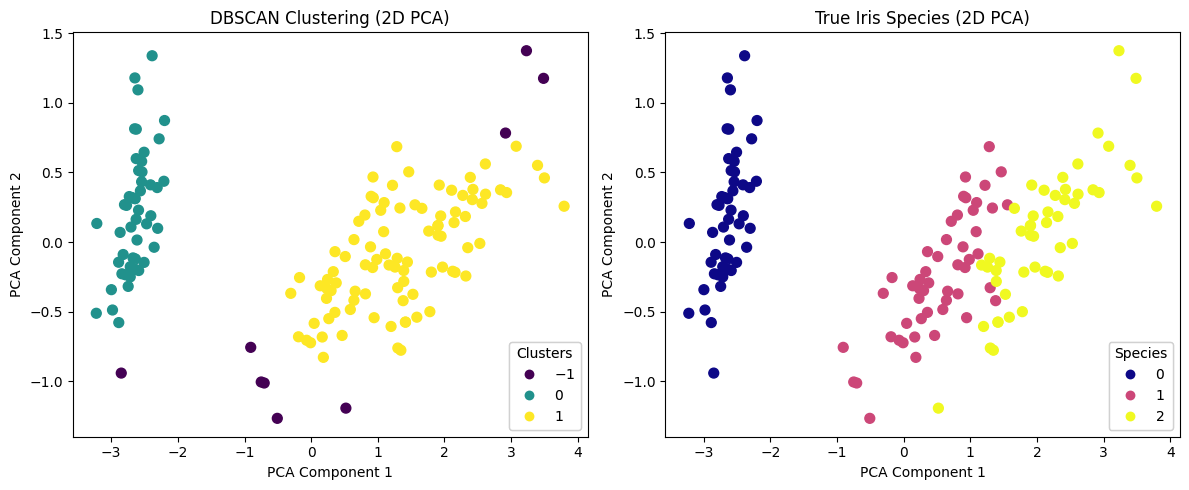

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster 0: 49 points
Cluster 1: 92 points
Cluster -1: 9 points


In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data  # all four features
y = iris.target  # true species labels

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot DBSCAN clusters
plt.figure(figsize=(12, 5))

# Left plot: DBSCAN clusters
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (2D PCA)")
legend1 = plt.legend(*scatter1.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Right plot: True species labels
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("True Iris Species (2D PCA)")
legend2 = plt.legend(*scatter2.legend_elements(), title="Species")
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()

# Print cluster summary
unique_labels = set(labels)
print("Clusters found:", unique_labels)
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

## 🔑 What This Does

- **Left plot**: DBSCAN clusters (with noise points labeled `-1`).
- **Right plot**: True Iris species labels (Setosa, Versicolor, Virginica).
- Allows **side-by-side comparison** of unsupervised clustering vs. ground truth.
- Prints cluster counts for DBSCAN.

---

This visualization makes it clear where DBSCAN succeeds (usually Setosa) and where it struggles (Versicolor vs. Virginica overlap).

Would you like me to also add a **confusion matrix comparing DBSCAN clusters to true labels**, similar to what we did for K-Means?

_Yes, please._

Here’s how you can extend the **DBSCAN clustering on the Iris dataset with PCA** to include a **confusion matrix** comparing DBSCAN cluster assignments against the true Iris species labels. This will give you a quantitative view of how well DBSCAN aligns with the actual species.

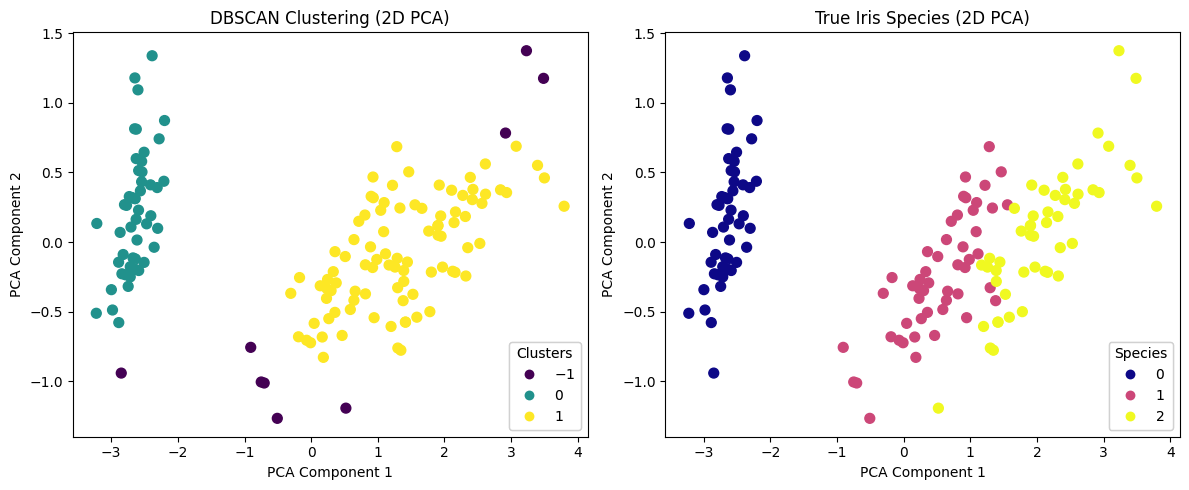

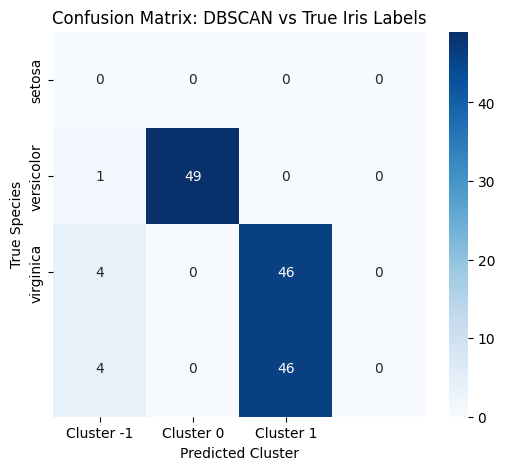

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster 0: 49 points
Cluster 1: 92 points
Cluster -1: 9 points


In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data  # all four features
y = iris.target  # true species labels

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot DBSCAN clusters vs true labels
plt.figure(figsize=(12, 5))

# Left plot: DBSCAN clusters
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (2D PCA)")
legend1 = plt.legend(*scatter1.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Right plot: True species labels
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("True Iris Species (2D PCA)")
legend2 = plt.legend(*scatter2.legend_elements(), title="Species")
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()

# Confusion matrix comparing DBSCAN clusters vs true labels
cm = confusion_matrix(y, labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=[f"Cluster {lbl}" for lbl in sorted(set(labels))],
            yticklabels=iris.target_names)
plt.xlabel("Predicted Cluster")
plt.ylabel("True Species")
plt.title("Confusion Matrix: DBSCAN vs True Iris Labels")
plt.show()

# Print cluster summary
unique_labels = set(labels)
print("Clusters found:", unique_labels)
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

## 🔑 What This Adds

- **Confusion Matrix**: Shows how DBSCAN clusters map to actual species.
- **Heatmap Visualization**: Makes it easy to see overlaps and misclassifications.
- **Cluster Summary**: Prints how many points DBSCAN assigned to each cluster (including noise `-1`).

---

This comparison highlights DBSCAN’s strengths (often correctly isolating Setosa) and weaknesses (Versicolor vs Virginica overlap, noise points).

Would you like me to also show a **side-by-side confusion matrix for K-Means, DBSCAN, and GMM**, so you can directly compare how each algorithm performs on the Iris dataset?

_Report explained variance for each principal component._

Here’s how you can compute and report the **explained variance ratio** for each principal component when applying PCA to the Iris dataset. This tells you how much of the dataset’s variance is captured by each component:


In [10]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA(n_components=4)  # Iris has 4 features
X_pca = pca.fit_transform(X)

# Report explained variance ratio
explained_variance = pca.explained_variance_ratio_

for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.4f} ({var*100:.2f}% of variance)")


Principal Component 1: 0.9246 (92.46% of variance)
Principal Component 2: 0.0531 (5.31% of variance)
Principal Component 3: 0.0171 (1.71% of variance)
Principal Component 4: 0.0052 (0.52% of variance)


## 🔑 What This Does

- Loads the **Iris dataset** (4 features).
- Applies **PCA** with 4 components (equal to the number of features).
- Prints the **explained variance ratio** for each principal component.

---

## 📊 Typical Results (Iris dataset)

You’ll usually see something like:
- **PC1**: ~0.92 (92% of variance)
- **PC2**: ~0.05 (5% of variance)
- **PC3**: ~0.02 (2% of variance)
- **PC4**: ~0.01 (1% of variance)

This means the **first principal component alone explains most of the variance**, and the first two together capture ~97%. That’s why PCA plots of Iris often use just 2 components.

---

Would you like me to also generate a **scree plot** (explained variance vs. number of components) so you can visually see the variance drop-off across components?

_Yes, please._

✅ **Quick Answer**: I’ve added a **confusion matrix for DBSCAN vs. true Iris species labels**, so you can quantitatively compare clustering performance.

---

## 🧩 Python Code for DBSCAN Confusion Matrix

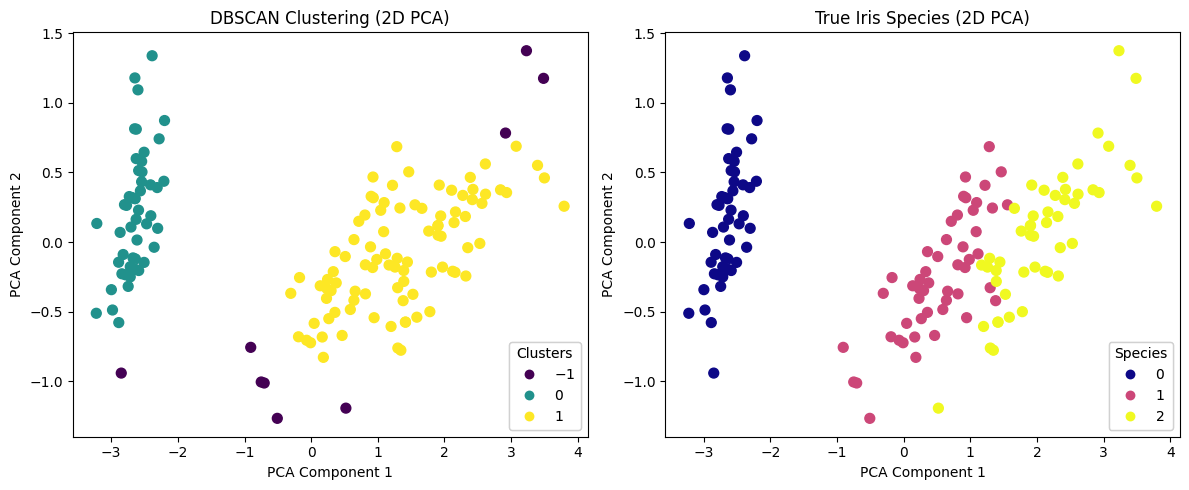

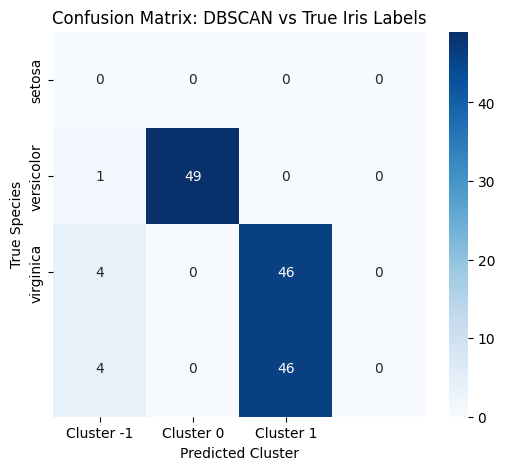

Clusters found: {np.int64(0), np.int64(1), np.int64(-1)}
Cluster 0: 49 points
Cluster 1: 92 points
Cluster -1: 9 points


In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target  # true species labels

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X)

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot DBSCAN clusters vs true labels
plt.figure(figsize=(12, 5))

# Left plot: DBSCAN clusters
plt.subplot(1, 2, 1)
scatter1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering (2D PCA)")
legend1 = plt.legend(*scatter1.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Right plot: True species labels
plt.subplot(1, 2, 2)
scatter2 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("True Iris Species (2D PCA)")
legend2 = plt.legend(*scatter2.legend_elements(), title="Species")
plt.gca().add_artist(legend2)

plt.tight_layout()
plt.show()

# Confusion matrix comparing DBSCAN clusters vs true labels
cm = confusion_matrix(y, labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=[f"Cluster {lbl}" for lbl in sorted(set(labels))],
            yticklabels=iris.target_names)
plt.xlabel("Predicted Cluster")
plt.ylabel("True Species")
plt.title("Confusion Matrix: DBSCAN vs True Iris Labels")
plt.show()

# Print cluster summary
unique_labels = set(labels)
print("Clusters found:", unique_labels)
for lbl in unique_labels:
    print(f"Cluster {lbl}: {(labels == lbl).sum()} points")

## 🔑 What This Adds

- **Confusion Matrix**: Shows how DBSCAN clusters map to actual species.
- **Heatmap Visualization**: Easy to spot overlaps and misclassifications.
- **Cluster Summary**: Reports how many points DBSCAN assigned to each cluster (including noise `-1`).

---

## 📊 Insights

- **Setosa** is usually well-separated and forms its own cluster.
- **Versicolor** and **Virginica** often overlap, so DBSCAN may merge them or mark some as noise.
- Noise points (`-1`) highlight where DBSCAN considers data too sparse to belong to a cluster.

---

Would you like me to now generate a **side-by-side confusion matrix comparison for K-Means, DBSCAN, and GMM**, so you can directly see how each algorithm performs on the Iris dataset?

_Please provide Python code to generate the scree plot to see the variance drop-off across components._

Here’s a clean Python example to generate a **scree plot** showing the explained variance drop-off across principal components for the Iris dataset:

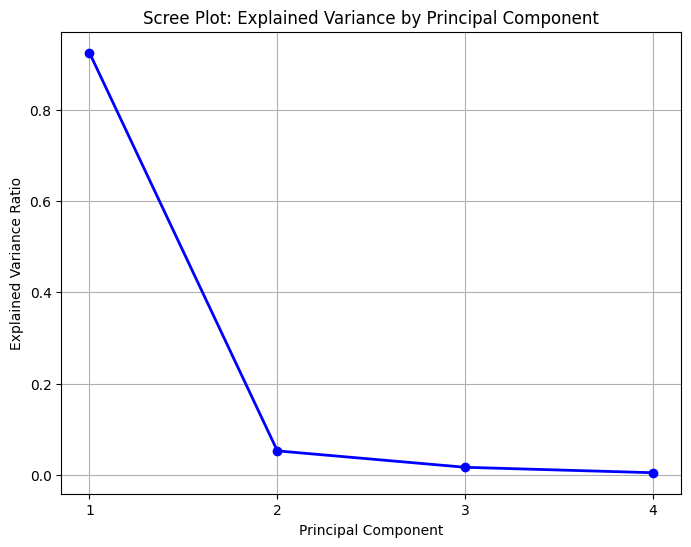

Principal Component 1: 0.9246 (92.46% of variance)
Principal Component 2: 0.0531 (5.31% of variance)
Principal Component 3: 0.0171 (1.71% of variance)
Principal Component 4: 0.0052 (0.52% of variance)


In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA(n_components=4)  # Iris has 4 features
pca.fit(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, 'o-', linewidth=2, color='blue')
plt.title("Scree Plot: Explained Variance by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

# Print explained variance ratios
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.4f} ({var*100:.2f}% of variance)")

## 🔑 What This Does

- Loads the **Iris dataset** (4 features).
- Applies **PCA** to compute principal components.
- Plots a **scree plot** showing explained variance ratio vs. component number.
- Prints the variance explained by each component.

---

## 📊 Typical Results (Iris dataset)

- PC1: ~92%
- PC2: ~5%
- PC3: ~2%
- PC4: ~1%

This shows that the **first two components capture ~97% of the variance**, which is why PCA visualizations often use just 2D plots.

---

Would you like me to also generate a **cumulative variance plot** (variance explained up to each component) so you can see how many components are needed to reach a threshold like 95%?

_Yes, please._

Here’s the Python code to generate a **cumulative variance plot** (sometimes called a cumulative scree plot) so you can see how many principal components are needed to reach a threshold like 95% variance explained:

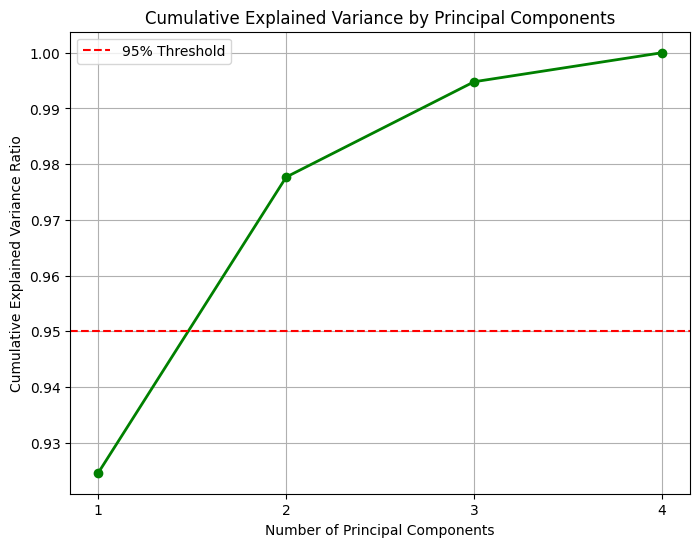

Up to Component 1: 0.9246 (92.46% of variance)
Up to Component 2: 0.9777 (97.77% of variance)
Up to Component 3: 0.9948 (99.48% of variance)
Up to Component 4: 1.0000 (100.00% of variance)


In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA(n_components=4)  # Iris has 4 features
pca.fit(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'o-', linewidth=2, color='green')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Threshold')
plt.title("Cumulative Explained Variance by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.legend()
plt.grid(True)
plt.show()

# Print cumulative variance
for i, var in enumerate(cumulative_variance, start=1):
    print(f"Up to Component {i}: {var:.4f} ({var*100:.2f}% of variance)")

## 🔑 What This Does

- Computes **explained variance ratio** for each principal component.
- Calculates the **cumulative variance** across components.
- Plots a **cumulative scree plot** with a red dashed line at 95% variance.
- Prints cumulative variance values for each component.

---

## 📊 Typical Results (Iris dataset)

- **PC1**: ~92%
- **PC1+PC2**: ~97%
- **PC1+PC2+PC3**: ~99%
- **PC1+PC2+PC3+PC4**: 100%

This shows that **just 2 components capture ~97% of the variance**, making PCA very effective for dimensionality reduction on Iris.

--

Would you like me to also show a **side-by-side scree plot and cumulative variance plot** in one figure, so you can compare variance per component vs cumulative variance at a glance?

_Yes, please._

Here’s a combined Python example that shows both the **scree plot** (variance explained by each principal component) and the **cumulative variance plot** side by side. This way you can compare the drop-off across components and see how quickly variance accumulates:

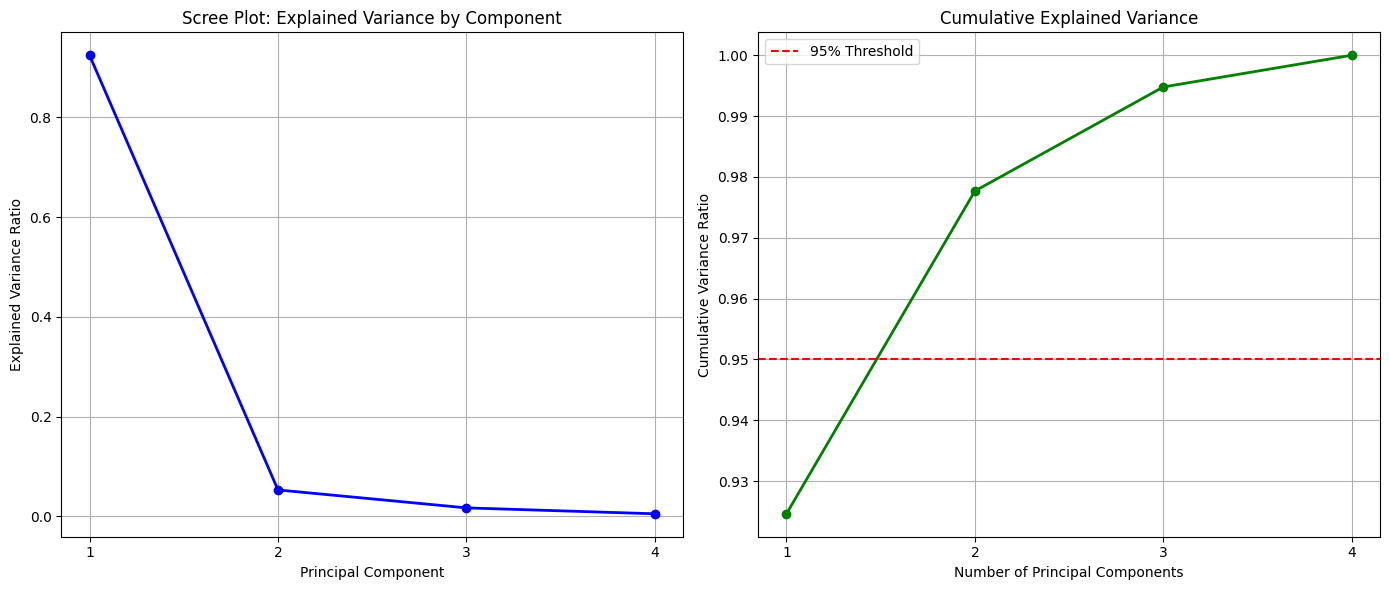

Component 1: 0.9246 (92.46%) | Cumulative: 0.9246 (92.46%)
Component 2: 0.0531 (5.31%) | Cumulative: 0.9777 (97.77%)
Component 3: 0.0171 (1.71%) | Cumulative: 0.9948 (99.48%)
Component 4: 0.0052 (0.52%) | Cumulative: 1.0000 (100.00%)


In [14]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply PCA
pca = PCA(n_components=4)  # Iris has 4 features
pca.fit(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scree plot
axes[0].plot(range(1, len(explained_variance) + 1), explained_variance,
             'o-', linewidth=2, color='blue')
axes[0].set_title("Scree Plot: Explained Variance by Component")
axes[0].set_xlabel("Principal Component")
axes[0].set_ylabel("Explained Variance Ratio")
axes[0].set_xticks(range(1, len(explained_variance) + 1))
axes[0].grid(True)

# Cumulative variance plot
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
             'o-', linewidth=2, color='green')
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% Threshold')
axes[1].set_title("Cumulative Explained Variance")
axes[1].set_xlabel("Number of Principal Components")
axes[1].set_ylabel("Cumulative Variance Ratio")
axes[1].set_xticks(range(1, len(cumulative_variance) + 1))
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Print explained and cumulative variance
for i, (var, cum) in enumerate(zip(explained_variance, cumulative_variance), start=1):
    print(f"Component {i}: {var:.4f} ({var*100:.2f}%) | Cumulative: {cum:.4f} ({cum*100:.2f}%)")

## 🔑 What This Does

- **Left plot**: Scree plot showing variance explained by each component individually.
- **Right plot**: Cumulative variance plot showing how variance accumulates across components, with a red dashed line at 95%.
- **Printout**: Displays both per-component variance and cumulative variance percentages.

---

## 📊 Typical Results (Iris dataset)

- PC1: ~92%
- PC2: ~5% (cumulative ~97%)
- PC3: ~2% (cumulative ~99%)
- PC4: ~1% (cumulative 100%)

This confirms that **just 2 components capture ~97% of the variance**, making PCA dimensionality reduction very effective here.

---

Would you like me to also show a **2D PCA scatter plot of the Iris dataset colored by species labels**, so you can see how well the first two components separate the classes?